# Examples

## Basic Examples

In [4]:
from sympy import *
hyper([1,1],[3,3,3],2.).evalf()

1.07893440206719

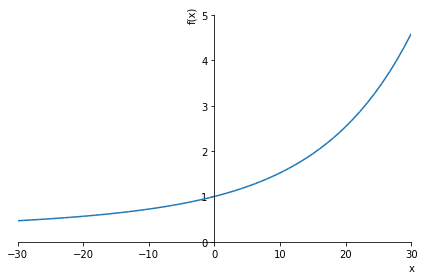

In [12]:
from sympy import *
from sympy.plotting import * 
x=symbols("x")
plot(hyper([1,1],[3,3,3],x),(x,-30,30),axis_center=(0,0),ylim=(0,5))

In [5]:
from sympy import *
from sympy.abc import z
hyperexpand(hyper([1,1],[3,3,3],z),rewrite=[log,polylog])
# 无法化简

hyper((1, 1), (3, 3, 3), z)

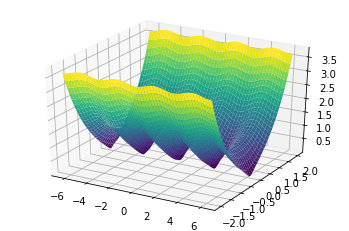

In [15]:
#### complexplot3D
from sympy import *
from sympy.functions import *
from sympy.plotting import *
from sympy.abc import x,y
plot3d(
    Abs(sin(x+I*y)),
    (x, -2*pi, 2*pi), (y, -2, 2)
    )


In [10]:
from sympy import *
from sympy.abc import x
hyper([1,1,2],[3,3],x).series(x0=oo,n=6)
# 无法 series

AttributeError: 'TupleArg' object has no attribute 'compute_leading_term'

## Scope

### Numerical Evaluation

In [11]:
from sympy import *
hyper([1,1,1],[Rational(3,2),Rational(3,2),Rational(3,2)],10).evalf(n=50)

530.19188827362590438855961685444087792733053398358

In [13]:
from sympy import *
hyper([1,1,1],[Rational(3,2),Rational(3,2),Rational(3,2)],10.00000000000000000000000000).evalf() # 和 Mathematica 一致

530.191888273626

In [17]:
from sympy import *
Array([0.1,0.3,0.5]).applyfunc(lambda x: hyper([1,2,3,4],[5,6,7],x).evalf()) 

[1.01163765887280, 1.03626644615971, 1.06295954475265]

#### 没有测时间函数

In [21]:
from sympy import *
sin(AccumBounds(-pi,pi))

AccumBounds(-1, 1)

In [23]:
from sympy import *
Array([1.2,1.5,1.8]).applyfunc(sin)

[0.932039085967226, 0.997494986604054, 0.973847630878195]

In [2]:
from sympy import *
Matrix([[pi,pi/2],[pi/3,pi/4]]).applyfunc(sin)

Matrix([
[        0,         1],
[sqrt(3)/2, sqrt(2)/2]])

### Specific Values

In [19]:
from sympy import *
hyper([1,1,3],[2,2],x).simplify()

-1/(2*x - 2) - log(1 - x)/(2*x)

In [22]:
from sympy import *
a,b,c,x=symbols("a b c x")
hyper([-3,a],[b,c],x).simplify()

(-a*x**3*(a + 1)*(a + 2) + 3*a*x**2*(a + 1)*(b + 2)*(c + 2) - 3*a*x*(b + 1)*(b + 2)*(c + 1)*(c + 2) + b*c*(b + 1)*(b + 2)*(c + 1)*(c + 2))/(b*c*(b + 1)*(b + 2)*(c + 1)*(c + 2))

In [25]:
from sympy import *
a1,a2,a3,b1,b2,b3=symbols("a1,a2,a3,b1,b2,b3")
hyper([a1,a2,a3],[b1,b2,b3],0).simplify()

1

In [32]:
from sympy import *
f=symbols("f",cls=Function)
x=symbols("x",real=True)
f=hyper([1,1,2],[3,3],x)-Rational(1,2)
solveset(Eq(f,0),domain=Interval.open(-8,-6))

ConditionSet(x, Eq(hyper((1, 1, 2), (3, 3), x) - 1/2, 0), Interval.open(-8, -6))

In [34]:
from sympy import *
f=symbols("f",cls=Function)
x=symbols("x",real=True)
f=hyper([1,1,2],[3,3],x)-Rational(1,2)
plot(f,(x,-10,3))

KeyboardInterrupt: 

### Visualization

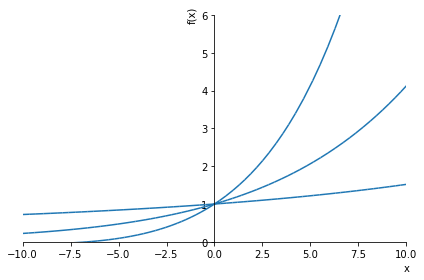

In [36]:
from sympy import *
from sympy.plotting import *
plot(hyper([1,1],[3,3,3],x),hyper([2,2],[3,3,3],x),hyper([3,3],[3,3,3],x),ylim=(0,6))

#### sympy 没有等高线绘图函数，等大神补充

#### sympy 没有极坐标绘图函数，等大神补充

## Function Properties

In [9]:
from sympy import *
from sympy.abc import *
##### 好像没定义域函数

Reals

In [12]:
from sympy import *


AccumBounds(-1, 1)

In [40]:
from sympy import *
a1,a2,x,b1,b2,b3=symbols("a1,a2,x,b1,b2,b3")
Eq(hyper([a1,a2],[b1,b2,b3],x),hyper([a2,a1],[b1,b2,b3],x)).simplify()

True

In [41]:
from sympy import *
a1,a2,x,b1,b2,b3=symbols("a1,a2,x,b1,b2,b3")
Eq(hyper([a1,a2],[b1,b2,b3],x),hyper([a1,a2],[b1,b3,b2],x)).simplify()

True

### Differentiation

In [42]:
from sympy import *
a1,a2,x,b1,b2,b3=symbols("a1,a2,x,b1,b2,b3")
diff(hyper([a1,a2],[b1,b2,b3],x),x)

a1*a2*hyper((a1 + 1, a2 + 1), (b1 + 1, b2 + 1, b3 + 1), x)/(b1*b2*b3)

In [44]:
from sympy import *
a1,a2,x,b1,b2,b3=symbols("a1,a2,x,b1,b2,b3")
Array(range(1,4)).applyfunc(lambda i:diff(hyper([a1,a2],[b1,b2,b3],x),x,i))

[a1*a2*hyper((a1 + 1, a2 + 1), (b1 + 1, b2 + 1, b3 + 1), x)/(b1*b2*b3), a1*a2*(a1 + 1)*(a2 + 1)*hyper((a1 + 2, a2 + 2), (b1 + 2, b2 + 2, b3 + 2), x)/(b1*b2*b3*(b1 + 1)*(b2 + 1)*(b3 + 1)), a1*a2*(a1 + 1)*(a1 + 2)*(a2 + 1)*(a2 + 2)*hyper((a1 + 3, a2 + 3), (b1 + 3, b2 + 3, b3 + 3), x)/(b1*b2*b3*(b1 + 1)*(b1 + 2)*(b2 + 1)*(b2 + 2)*(b3 + 1)*(b3 + 2))]

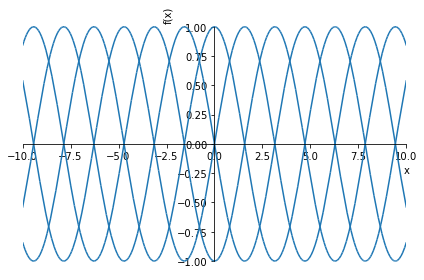

In [17]:
from sympy import *
from sympy.abc import *
from sympy.plotting import *
# 不知道怎么画列表，等大神出手

In [25]:
from sympy import *
from sympy.abc import *
n=symbols("n",integer=True,positive=True)
diff(sin(x),x,n)

0

### Integration

In [47]:
from sympy import *
a1,a2,x,b1,b2,b3=symbols("a1,a2,x,b1,b2,b3")
integrate(hyper([a1,a2],[b1,b2,b3],x),x)
# failed

Integral(hyper((a1, a2), (b1, b2, b3), x), x)

In [48]:
from sympy import *
a1,a2,x,b1,b2,b3=symbols("a1,a2,x,b1,b2,b3")
integrate(hyper([a1,a2],[b1,b2,b3],x),(x,0,1))

Integral(hyper((a1, a2), (b1, b2, b3), x), (x, 0, 1))

In [50]:
from sympy import *
a1,a2,α,x,b1,b2,b3=symbols("a1,a2,α,x,b1,b2,b3")
integrate(x**(α-1)*hyper([a1,a2],[b1,b2,b3],x),x)
# failed

Integral(x**(α - 1)*hyper((a1, a2), (b1, b2, b3), x), x)

### Series Expansions

In [52]:
from sympy import *
a1,a2,α,x,b1,b2,b3=symbols("a1,a2,α,x,b1,b2,b3")
hyper([a1,a2],[b1,b2,b3],x).series(x0=0,n=3)
# 解不出

ValueError: x must be given for multivariate functions.

#### 画不来批量的图

In [ ]:
#### 不会级数系数列表

In [38]:
from sympy import *
from sympy.abc import z
fourier_series(sin(z),z,1)
# 和 MMA 不一样

ValueError: Invalid limits given: z

In [53]:
from sympy import *
# 不能处理 hyper 的级数

### Function Representations

In [56]:
from sympy import *
a1,a2,k,x,b1,b2,b3=symbols("a1,a2,k,x,b1,b2,b3")
Sum(rf(a1,k)*rf(a2,k)*z**k/(rf(b1,k)*rf(b2,k)*rf(b3,k)*factorial(k)),(k,0,oo)).simplify()
# 化简结果应该是 hyper([a1,a2],[b1,b2,b3],x)

Sum(z**k*RisingFactorial(a1, k)*RisingFactorial(a2, k)/(RisingFactorial(b1, k)*RisingFactorial(b2, k)*RisingFactorial(b3, k)*factorial(k)), (k, 0, oo))

In [57]:
from sympy import *
# 没有 DifferentialRootReduce，MeijerGReduce

## Applications

In [66]:
from sympy import *
f=symbols("f",cls=Function)
z=symbols("z")
dsolve(
    Eq(diff(f,z,z,z),z**3*f),z
    )
# 搞不懂

TypeError: as_base_exp() missing 1 required positional argument: 'self'

In [103]:
from sympy import *
import numpy as np
def x(m,n,t):
    return Sum(-(1/(factorial(k)* n)) *
    rf(1 + (k - 1)/n,    k - 1)*
    E**(((k - 1) *2* pi *I* m)/n)*
    t**k*
    hyper(Array(list(np.arange(1,n))).applyfunc(lambda jj: (k - 1)/n + jj/(n + 1))
    , 
    Array(list(np.arange(k + 1,k+ n+1)).pop( n - k-1)).applyfunc(lambda jj:jj/n)
    ,
    (n + 1) (((n + 1)* t)/n)**n), (k, 0, n - 1)
    )
x(1,4,1)
# 放弃这个例子

TypeError: 'Add' object cannot be interpreted as an integer

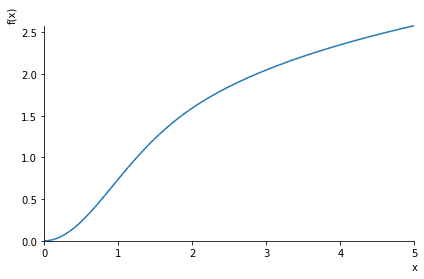

In [104]:
from sympy import *
from sympy.plotting import *
x=symbols("x")
def v(x):
    return x**2*hyper([1,1],[2,Rational(3,2)],-x**2)
plot(v(x), (x, 0, 5))

#### Expansion at infinity reveals logarithmic growth:

#### Surface tension of an electrolyte solution as a function of concentration y:

In [73]:
from sympy import *
y=symbols('y')
2*besselk(0,2*sqrt(y))*hyper([1],[Rational(2,3),Rational(5,3)],y)+3*sqrt(y)*besselk(1,2*sqrt(y))*hyper([1],[Rational(5,3),Rational(5,3)],y)

3*sqrt(y)*besselk(1, 2*sqrt(y))*hyper((1,), (5/3, 5/3), y) + 2*besselk(0, 2*sqrt(y))*hyper((1,), (2/3, 5/3), y)

#### 级数展开不算了

In [75]:
from sympy import *
from sympy.plotting import *
z,t,m=symbols("z t m")
integrate((z-t)**(-m-1)*sin(t)/gamma(-m),(t,0,z))
# sympy failed

KeyboardInterrupt: 

In [76]:
from sympy import *
from sympy.plotting import *
z,t,m=symbols("z t m")
plot(  integrate((z-t)**(-m-1)*sin(t)/gamma(-m),(t,0,z)),(z,0,2*pi),(m,-1,1
# 不指望能算))

KeyboardInterrupt: 

## Properties & Relations

In [77]:
from sympy import *
x=symbols("x")
integrate(exp(-x**2)*log(x),x)

-x*hyper((1/2, 1/2), (3/2, 3/2), -x**2) + sqrt(pi)*log(x)*erf(x)/2

In [81]:
from sympy import *
Sum(factorial(2*k)/factorial(4*k+3),(k,0,oo))
# 化简不了

Sum(factorial(2*k)/factorial(4*k + 3), (k, 0, oo))

In [82]:
from sympy import *
x=symbols("x")
expand_func(hyper([Rational(3,2)],[1,1],x))

2*sqrt(x)*besseli(0, sqrt(x))*besseli(1, sqrt(x)) + besseli(0, sqrt(x))**2

## Possible Issues

In [86]:
from sympy import *
hyper([10,10],[50],2.).evalf()

-1705.75733163554 - 356.749986056024*I

In [88]:
from sympy import *
a,b,c,d,e,z=symbols("a,b,c,d,e,z")
hyper([a,b,c],[a,d,e],z).simplify()

hyper((b, c), (d, e), z)

In [89]:
from sympy import *
a,b,c,d,e,z=symbols("a,b,c,d,e,z")
hyper([-2,a,b,c],[-2,d,e],z).simplify()

(a*b*c*z**2*(a + 1)*(b + 1)*(c + 1)/2 + a*b*c*z*(d + 1)*(e + 1) + d*e*(d + 1)*(e + 1))/(d*e*(d + 1)*(e + 1))

## Neat Example

In [91]:
from sympy import *
from sympy.plotting import *
hyper(Array(range(2)),range(3),x)

hyper((0, 1), (0, 1, 2), x)

In [115]:
from sympy import *
import numpy as np
n,ε,λ,ω=symbols("n,ε,λ,ω")
def period(n,ε,λ,ω):
    return 2*pi/ω*hyper(
        np.arange(Rational(1,2),n+Rational(1,2))/n,
        np.arange(1,n)/(n-1),
        -(2*n/ω**2)**n*(λ*ε**(n-1))/(n-1)**(n-1)
        )
period(2,ε,λ,ω).simplify()

2*pi*hyper((1/4, 3/4), (1.0,), 16*ε*λ*exp_polar(I*pi)/ω**4)/ω

In [120]:
from sympy import *
import numpy as np
n,ε,λ,ω=symbols("n,ε,λ,ω")
def period(n,ε,λ,ω):
    return 2*pi/ω*hyper(
        np.arange(Rational(1,2),n+Rational(1,2))/n,
        np.arange(1,n)/(n-1),
        -(2*n/ω**2)**n*(λ*ε**(n-1))/(n-1)**(n-1)
        )
limit(period(2,ε,λ,ω),ω,0,"+").simplify()
# 搞不懂

oo*sign(hyper((1/4, 3/4), (1.0,), ε*λ*polar_lift(zoo)))